## Task 2: Quantitative analysis using pynance and TaLib

In [5]:
import pandas as pd
import os

# List of file paths
file_paths = [
    "../src/data/AAPL_historical_data.csv",
    "../src/data/AMZN_historical_data.csv",
    "../src/data/GOOG_historical_data.csv",
    "../src/data/META_historical_data.csv",
    "../src/data/MSFT_historical_data.csv",
    "../src/data/NVDA_historical_data.csv",
    "../src/data/TSLA_historical_data.csv"
]

# Initialize an empty DataFrame
combined_data = pd.DataFrame()

# Load and combine the data
for file_path in file_paths:
    # Load the data into a DataFrame
    data = pd.read_csv(file_path)
    
    # Extract the stock symbol from the file name
    stock_symbol = os.path.basename(file_path).split('_')[0]
    
    # Add a column for the stock symbol
    data['Stock'] = stock_symbol
    
    # Append the data to the combined DataFrame
    combined_data = pd.concat([combined_data, data], ignore_index=True)

# Display the first few rows of the combined DataFrame
print(combined_data.head())

# Save the combined data to a new CSV file
combined_data.to_csv("../src/data/combined_historical_data.csv", index=False)

# Display the last few rows of the combined DataFrame
print(combined_data.tail())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits Stock  
0        0.0           0.0  AAPL  
1        0.0           0.0  AAPL  
2        0.0           0.0  AAPL  
3        0.0           0.0  AAPL  
4        0.0           0.0  AAPL  
             Date        Open        High         Low       Close   Adj Close  \
45423  2024-07-24  225.419998  225.990005  214.710007  215.990005  215.990005   
45424  2024-07-25  216.800003  226.000000  216.229996  220.250000  220.250000   
45425  2024-07-26  221.190002  222.279999  215.330002  219.800003  219.8

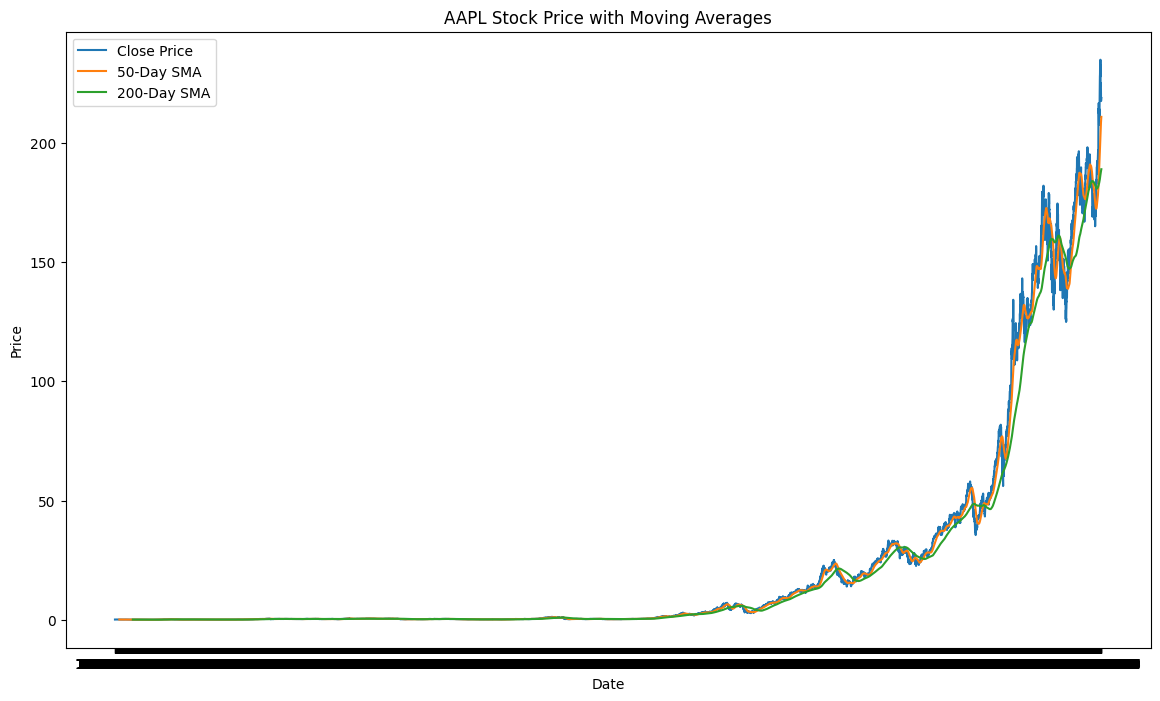

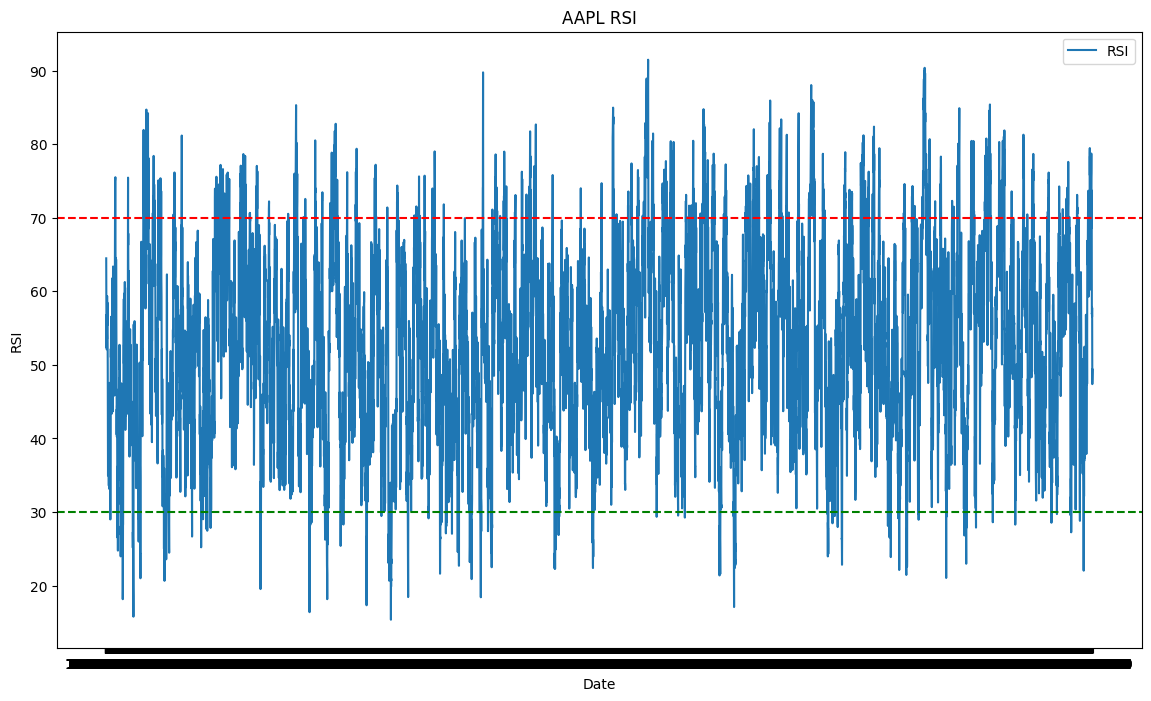

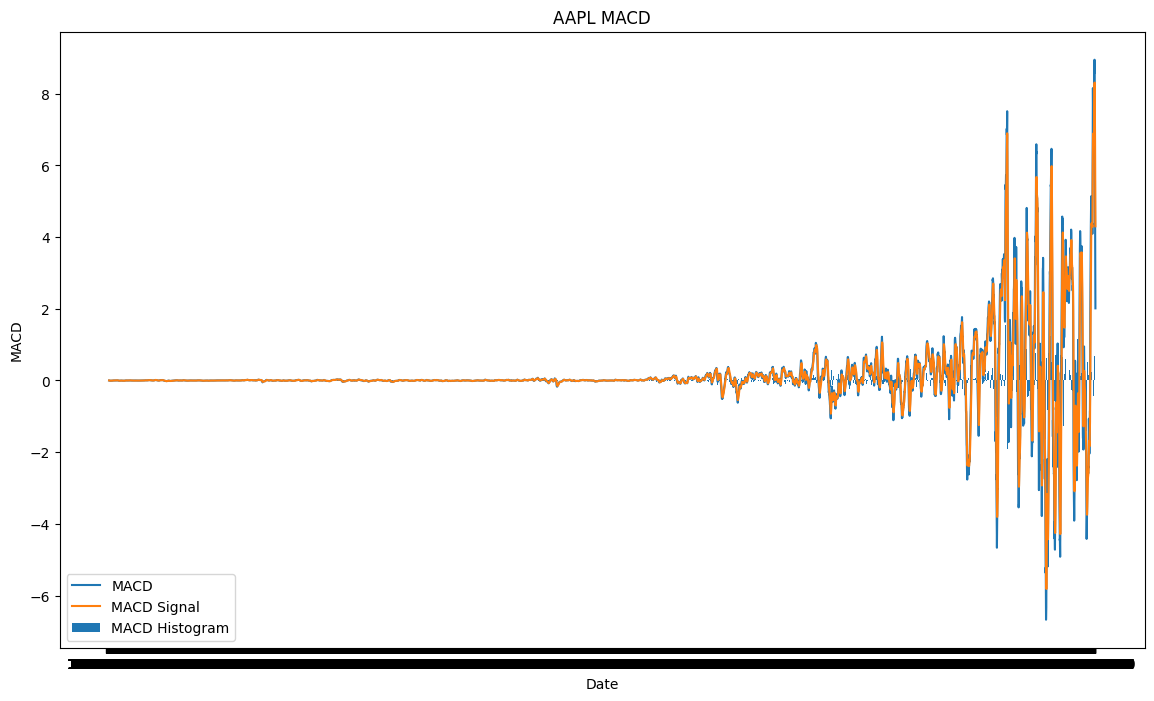

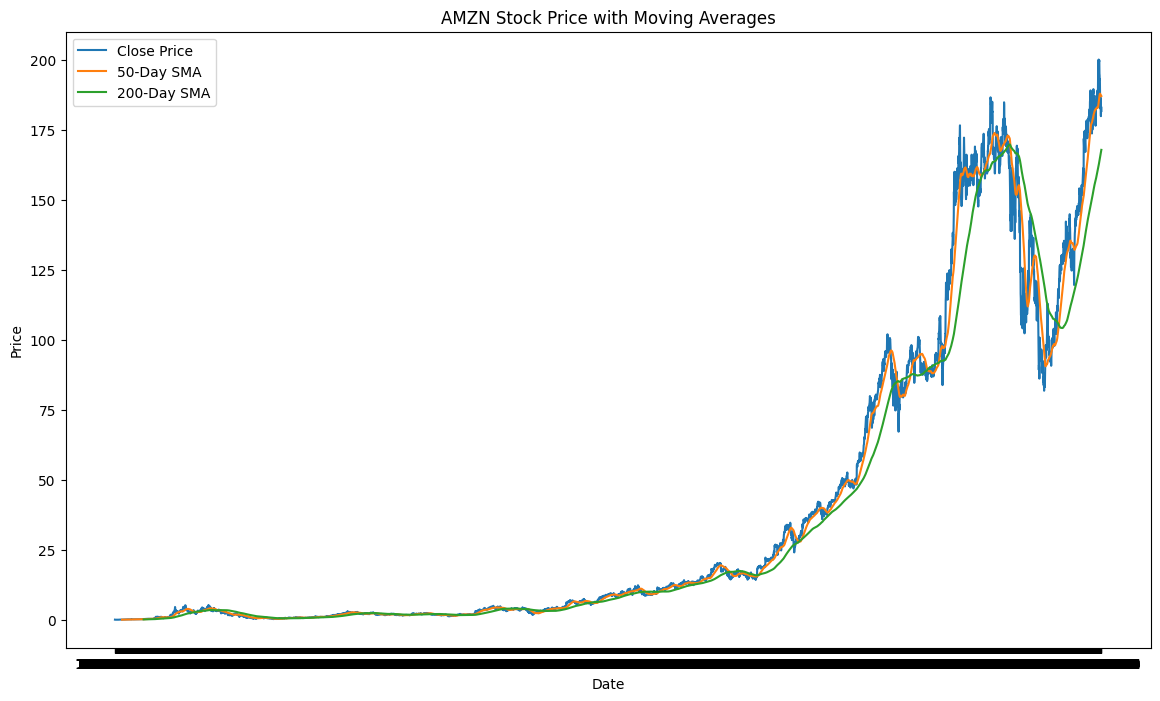

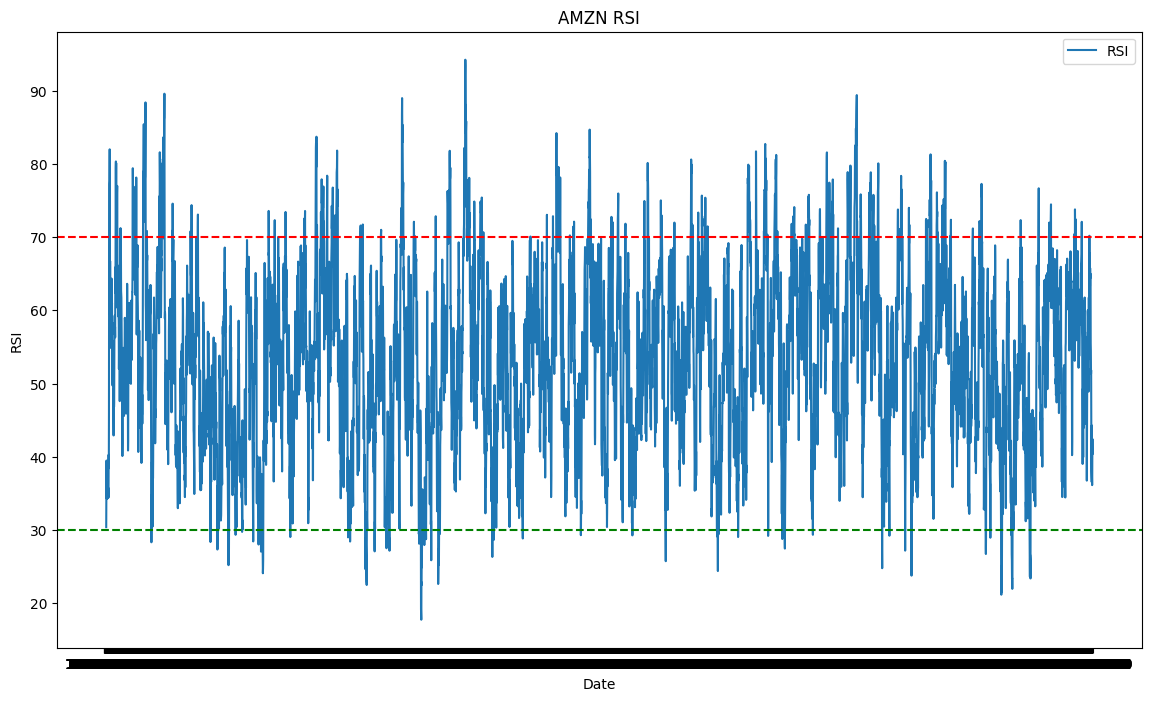

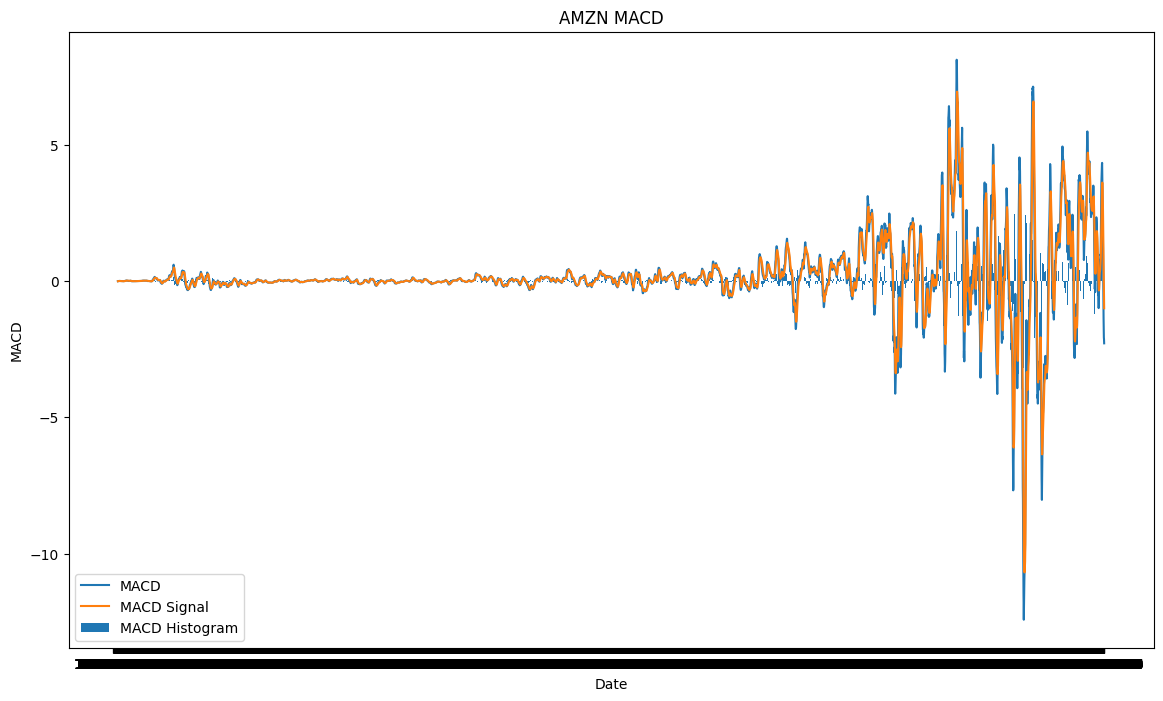

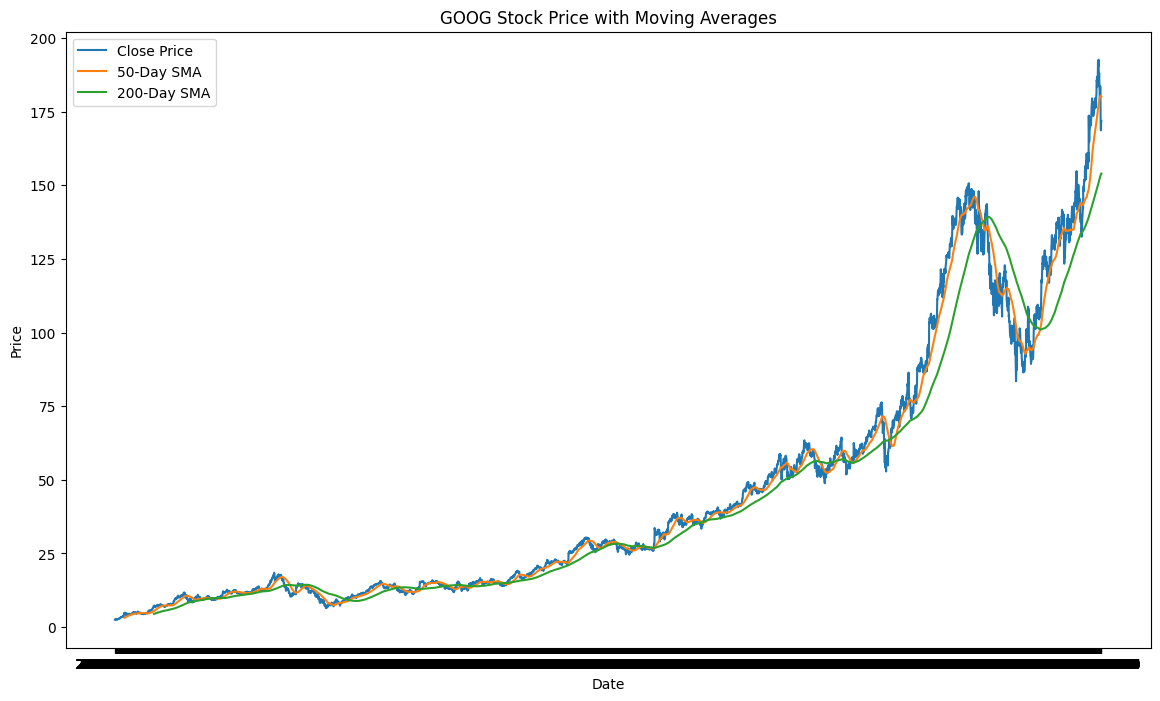

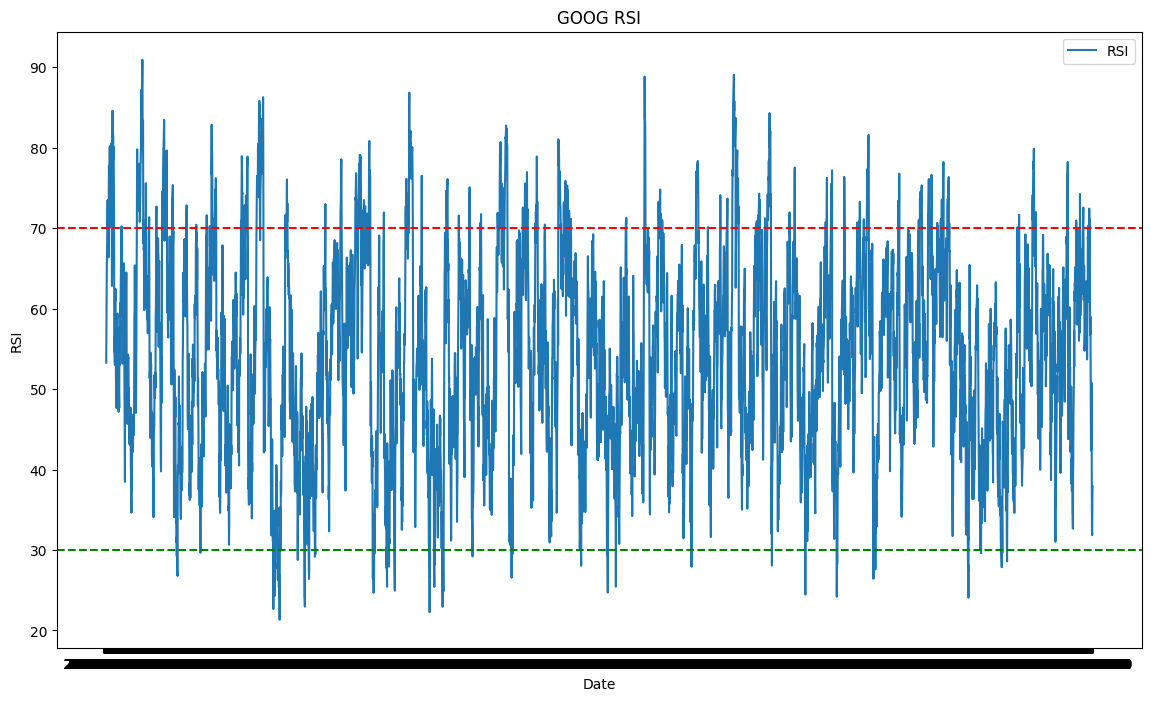

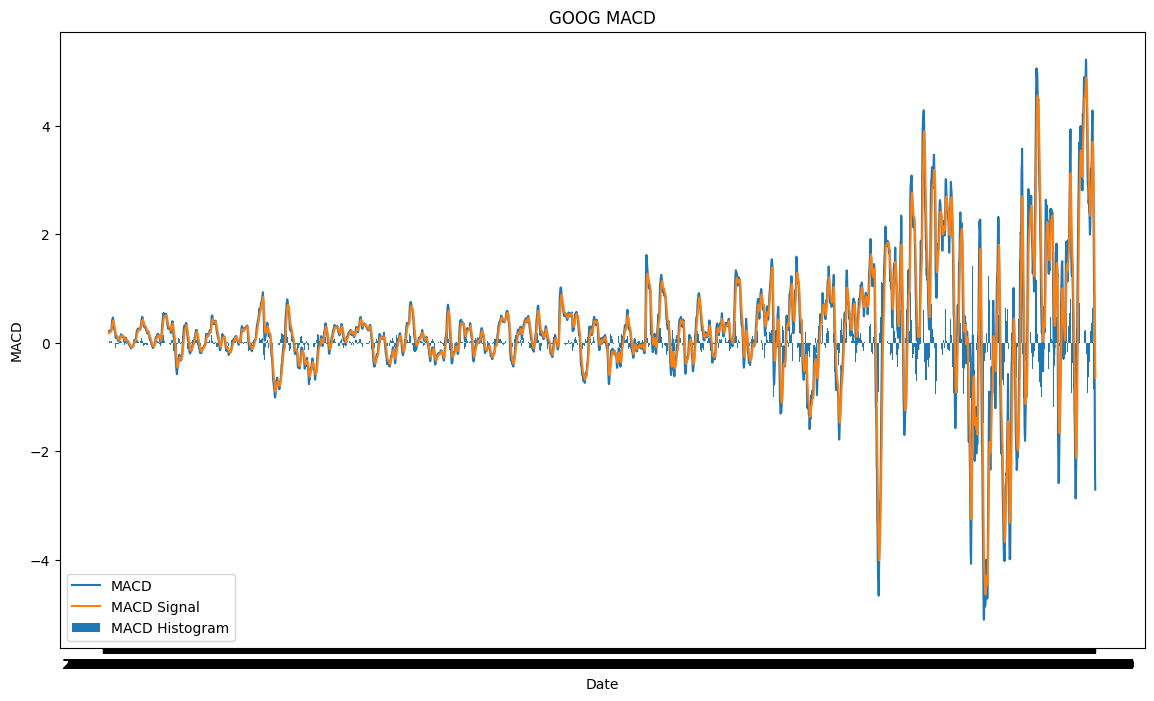

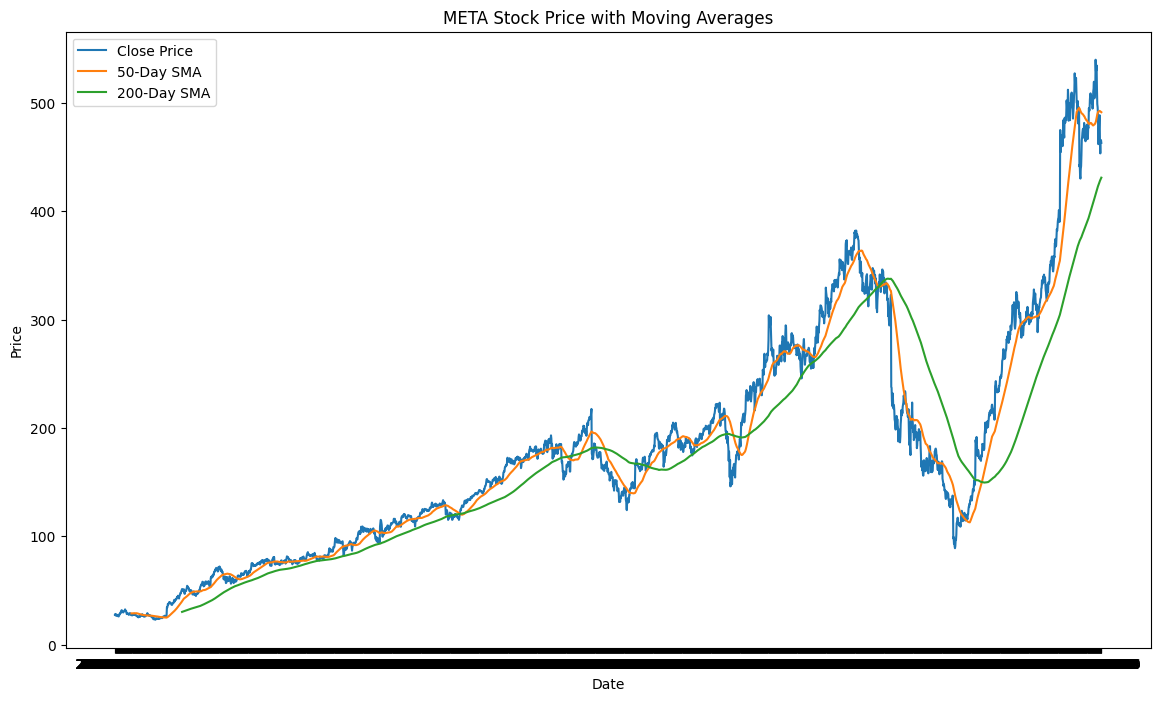

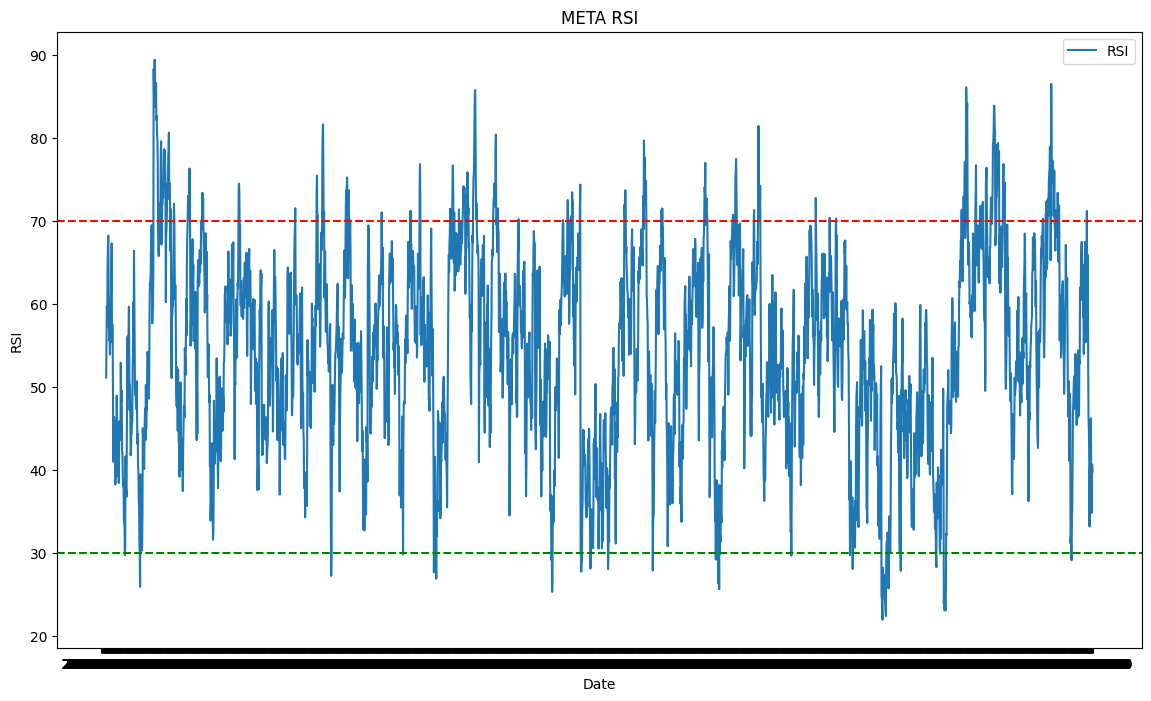

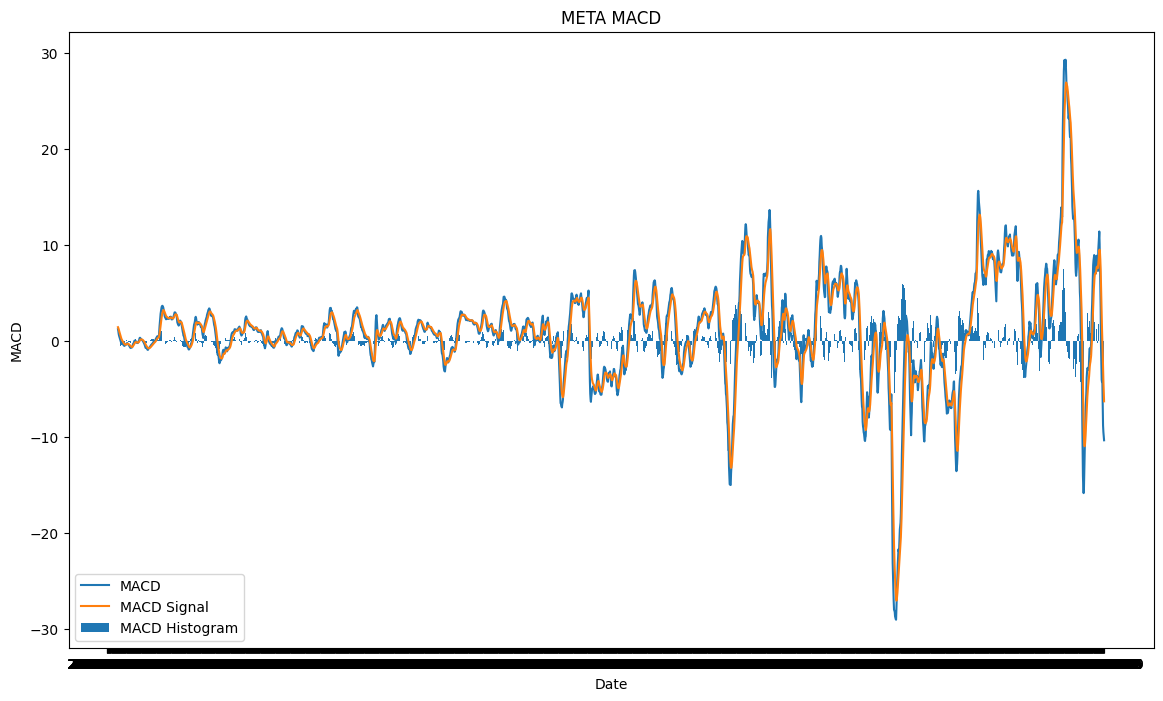

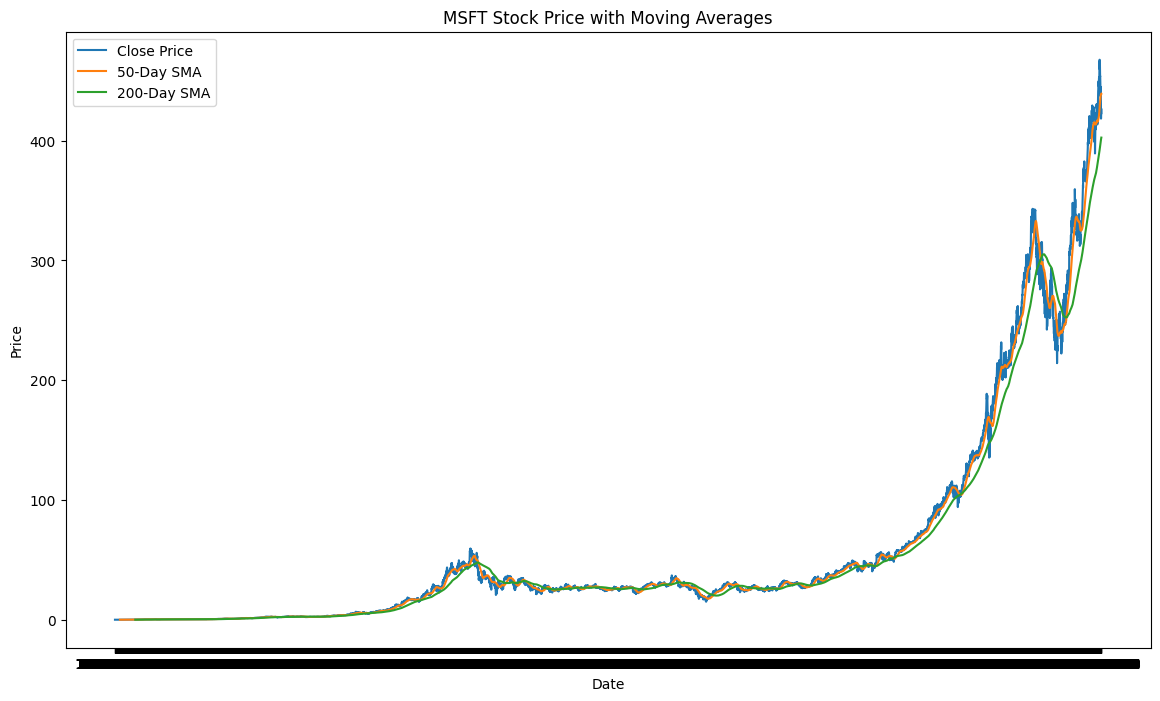

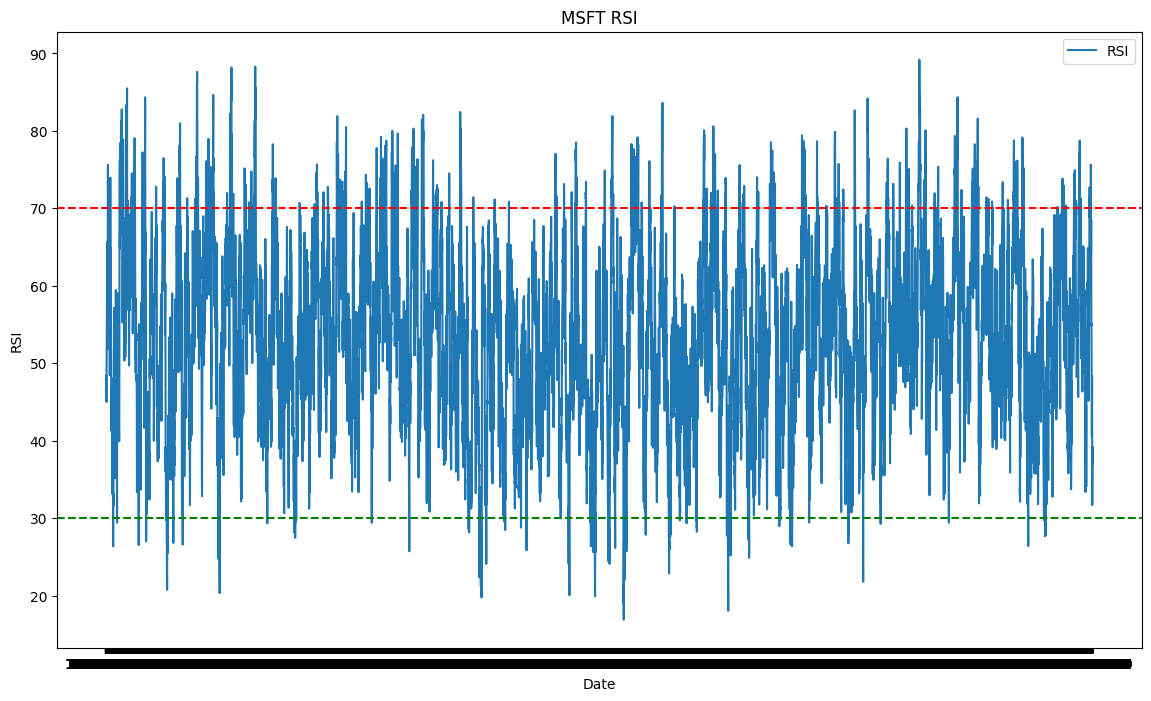

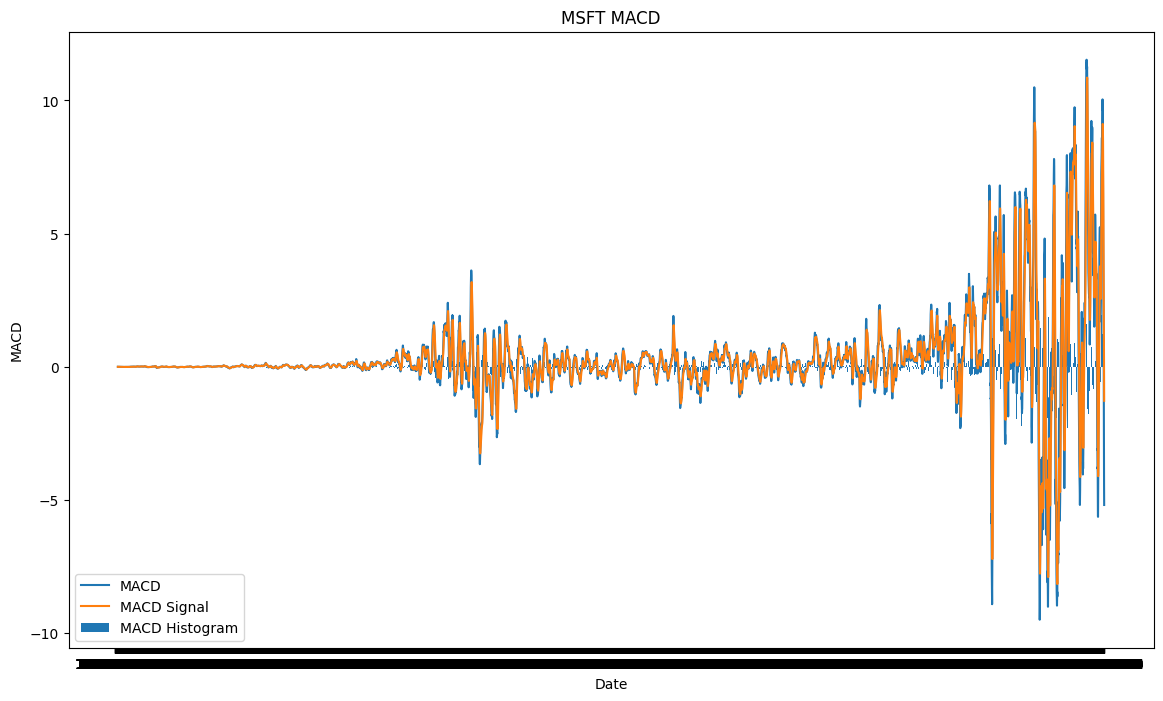

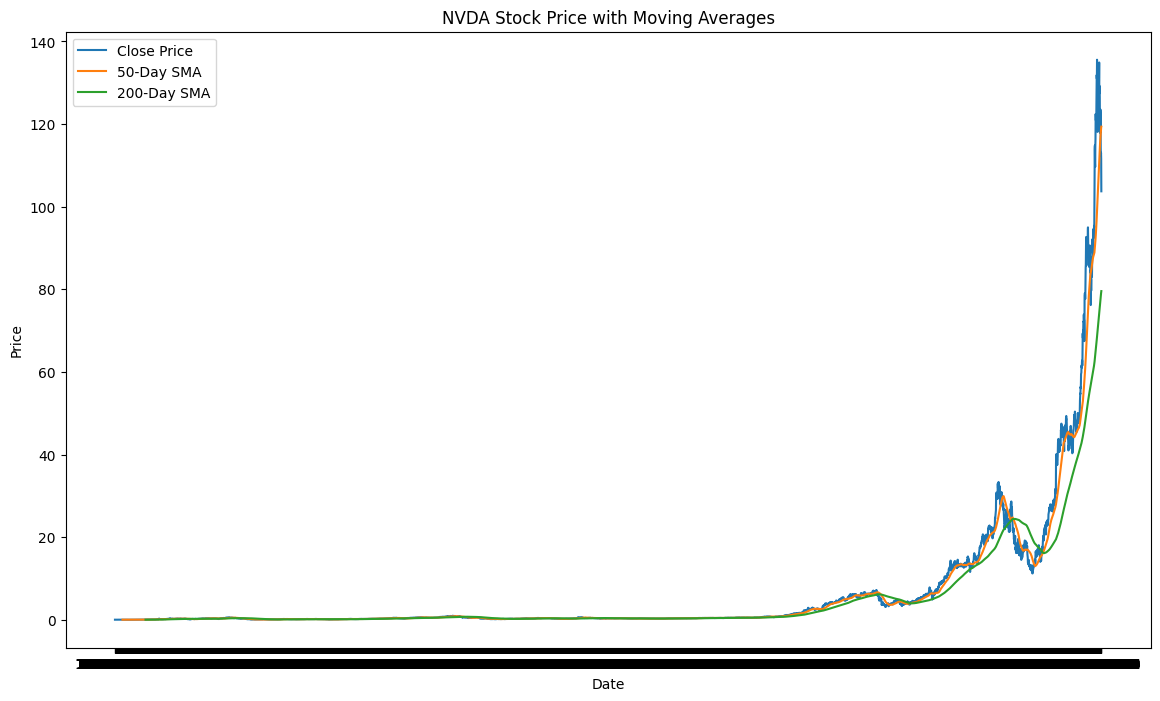

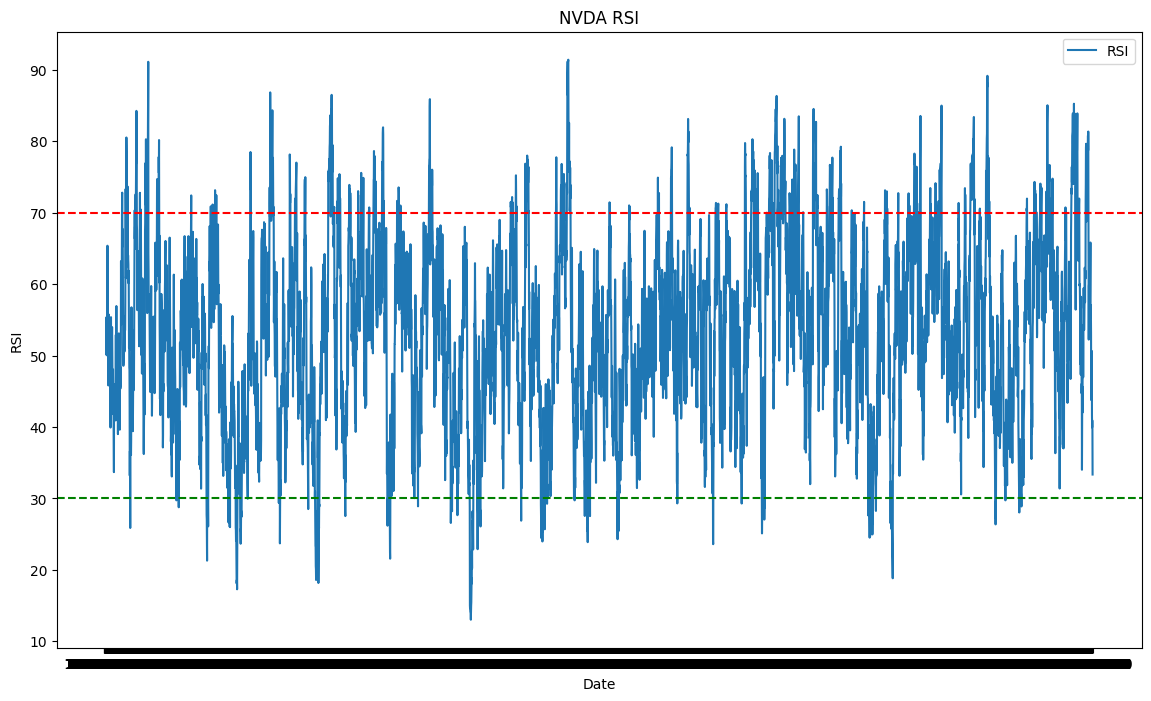

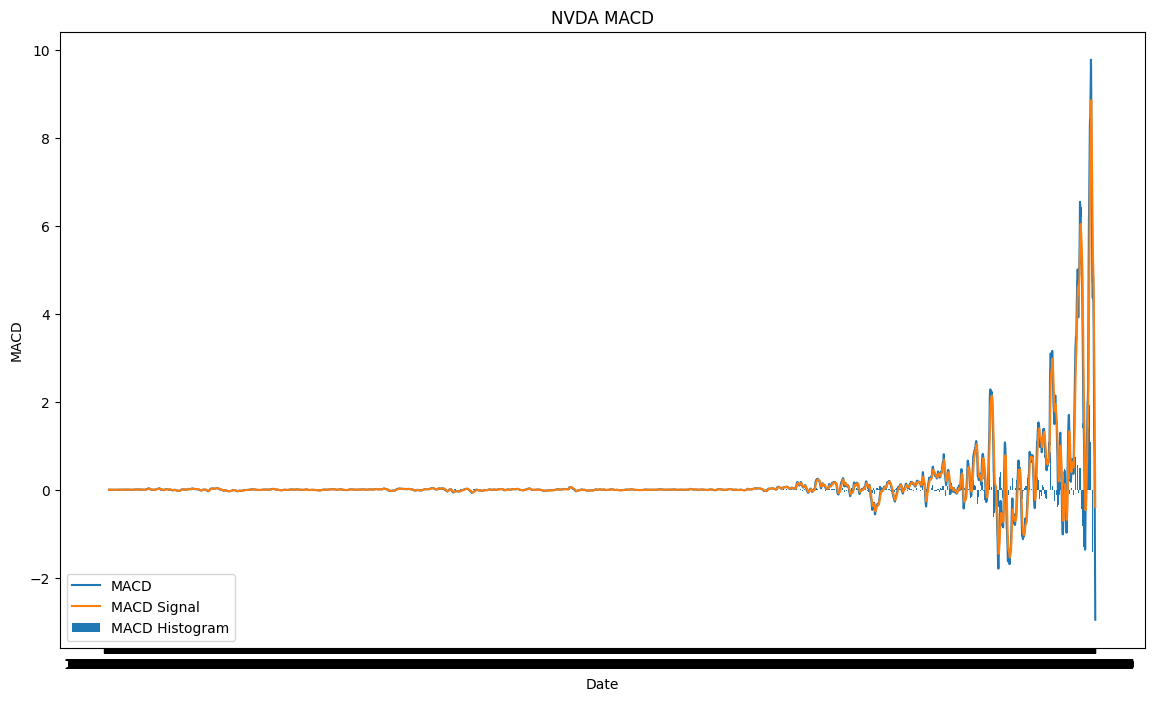

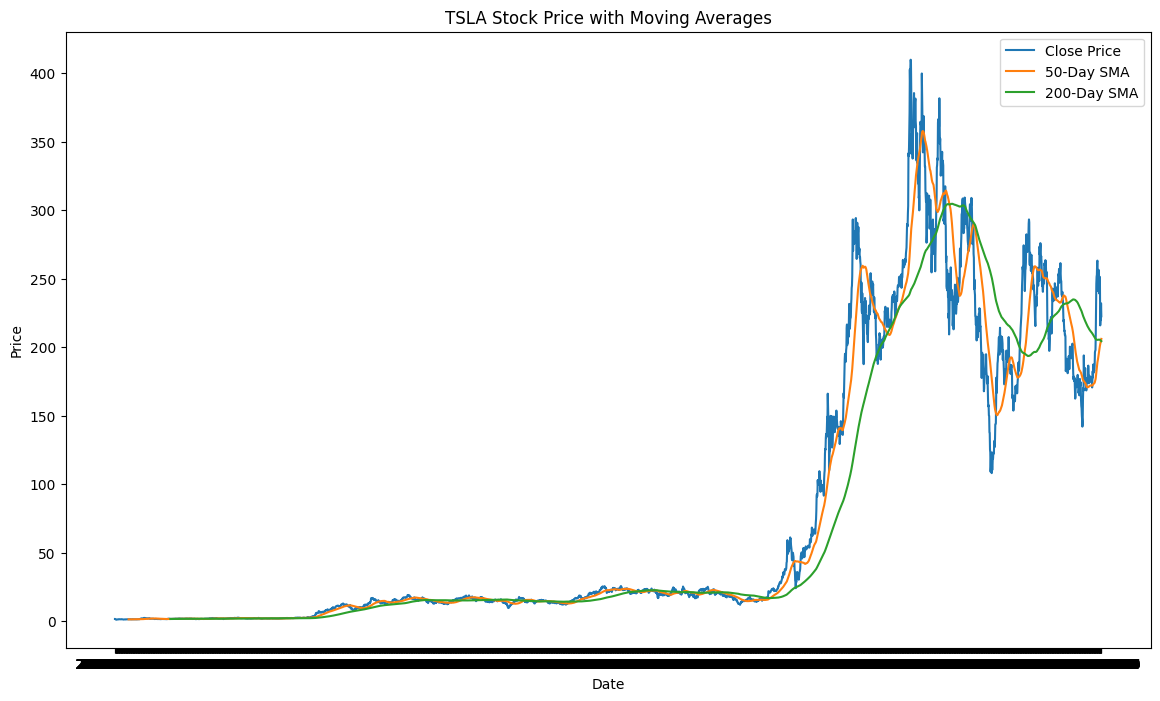

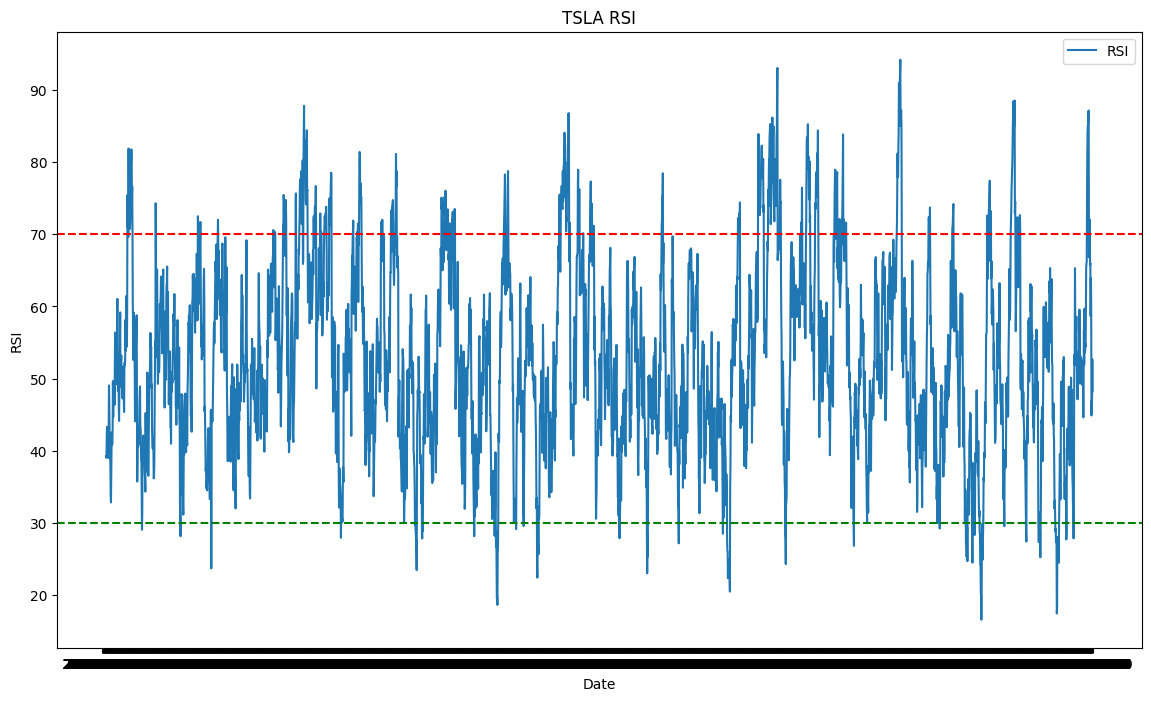

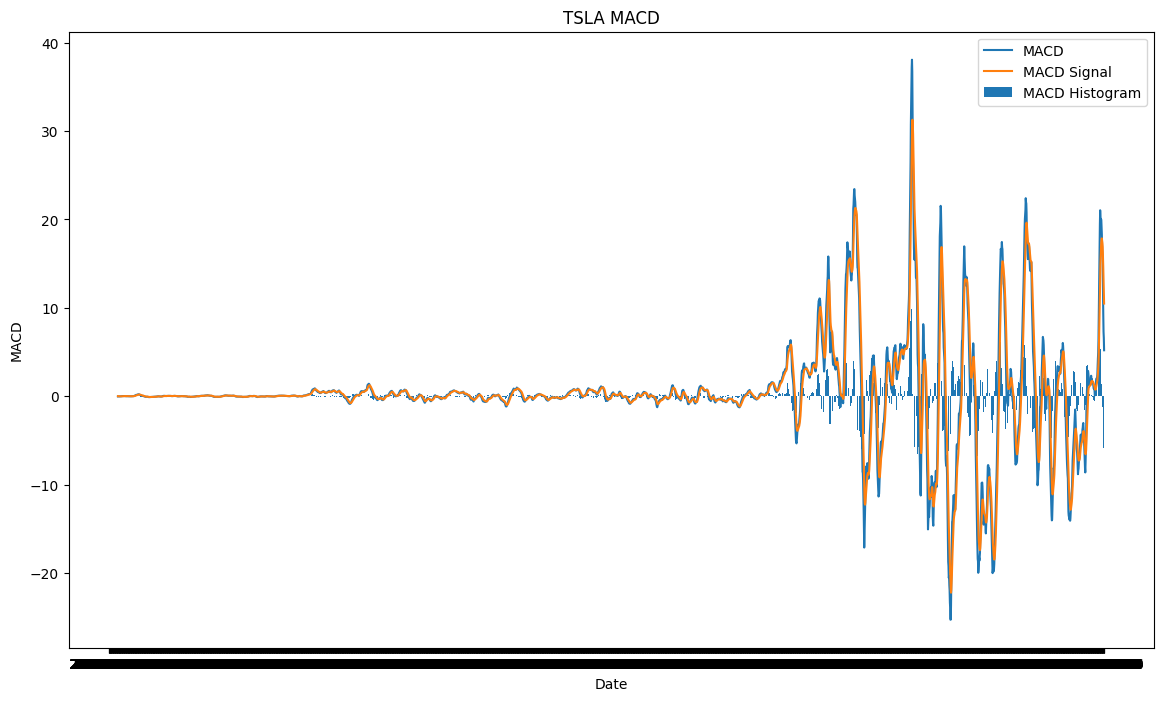

In [13]:
import talib
import matplotlib.pyplot as plt

# List of file paths
file_paths = [
    "../src/data/AAPL_historical_data.csv",
    "../src/data/AMZN_historical_data.csv",
    "../src/data/GOOG_historical_data.csv",
    "../src/data/META_historical_data.csv",
    "../src/data/MSFT_historical_data.csv",
    "../src/data/NVDA_historical_data.csv",
    "../src/data/TSLA_historical_data.csv"
]

# Function to calculate indicators and visualize data
def analyze_stock(file_path):
    # Load the data into a DataFrame
    data = pd.read_csv(file_path)
    
    # Extract the stock symbol from the file name
    stock_symbol = os.path.basename(file_path).split('_')[0]
    
    # Calculate Moving Averages
    data['SMA_50'] = talib.SMA(data['Close'], timeperiod=50)
    data['SMA_200'] = talib.SMA(data['Close'], timeperiod=200)
    
    # Calculate RSI (Relative Strength Index)
    data['RSI'] = talib.RSI(data['Close'], timeperiod=14)
    
    # Calculate MACD (Moving Average Convergence Divergence)
    data['MACD'], data['MACD_Signal'], data['MACD_Hist'] = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    
    # Plot Moving Averages
    plt.figure(figsize=(14, 8))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.plot(data['Date'], data['SMA_50'], label='50-Day SMA')
    plt.plot(data['Date'], data['SMA_200'], label='200-Day SMA')
    plt.title(f'{stock_symbol} Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    
    # Plot RSI
    plt.figure(figsize=(14, 8))
    plt.plot(data['Date'], data['RSI'], label='RSI')
    plt.axhline(70, color='red', linestyle='--')
    plt.axhline(30, color='green', linestyle='--')
    plt.title(f'{stock_symbol} RSI')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.show()
    
    # Plot MACD
    plt.figure(figsize=(14, 8))
    plt.plot(data['Date'], data['MACD'], label='MACD')
    plt.plot(data['Date'], data['MACD_Signal'], label='MACD Signal')
    plt.bar(data['Date'], data['MACD_Hist'], label='MACD Histogram')
    plt.title(f'{stock_symbol} MACD')
    plt.xlabel('Date')
    plt.ylabel('MACD')
    plt.legend()
    plt.show()

# Analyze each stock
for file_path in file_paths:
    analyze_stock(file_path)

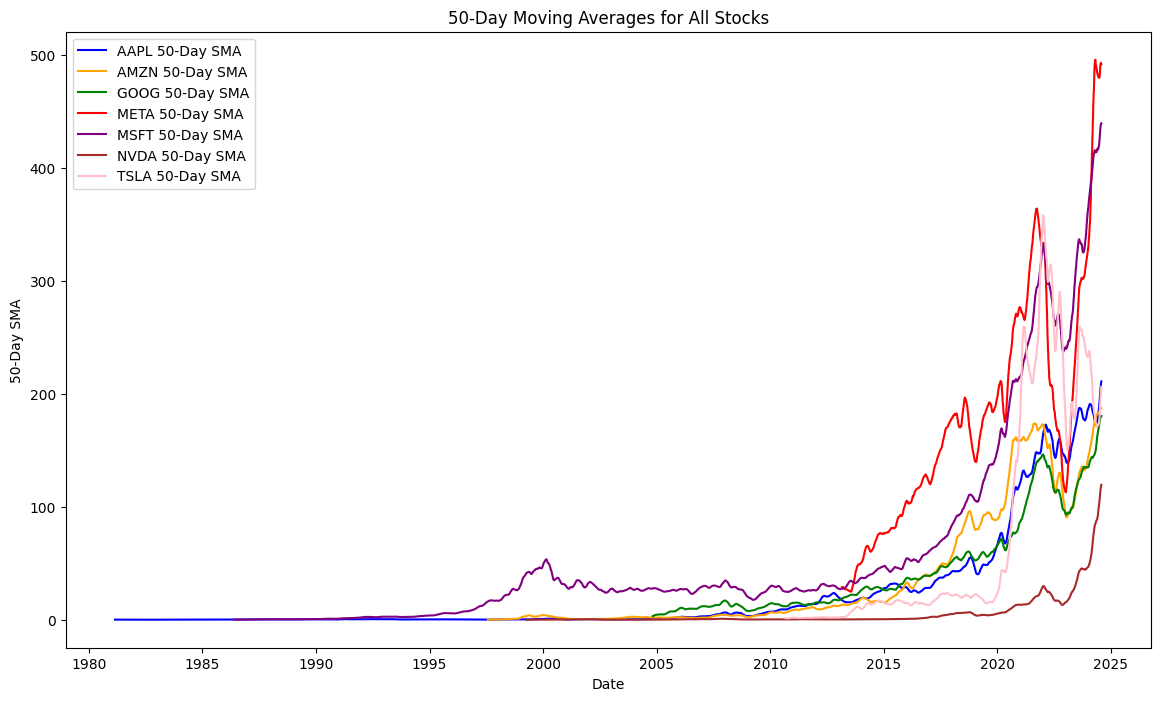

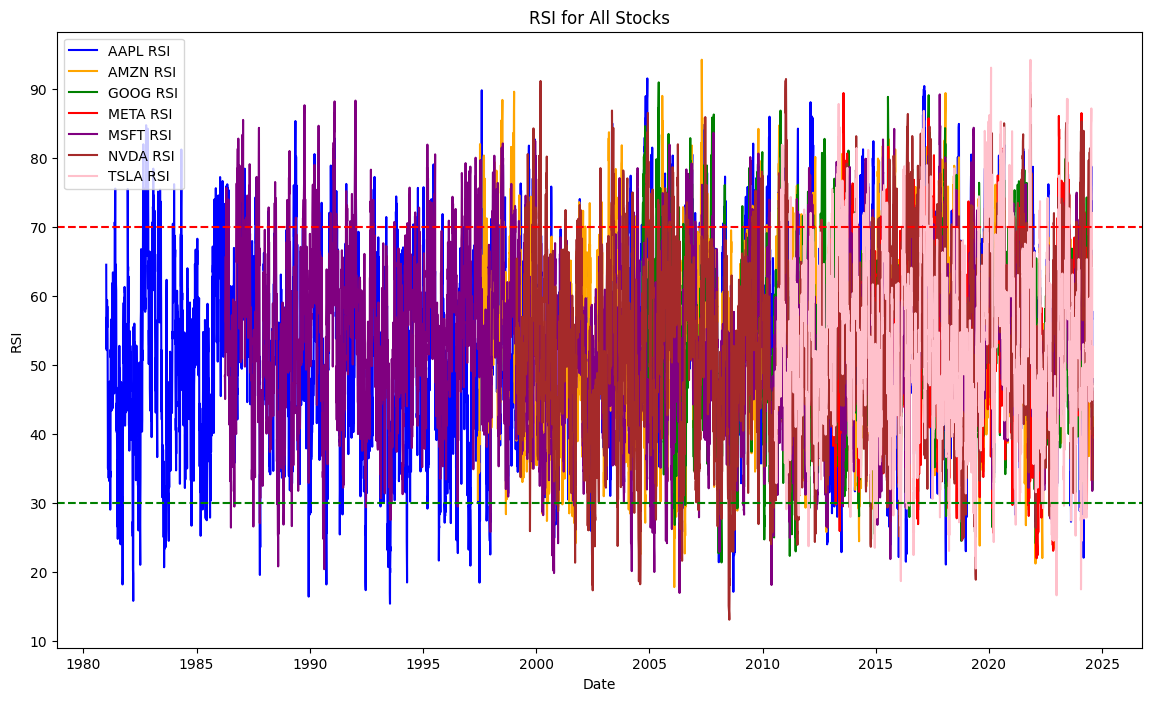

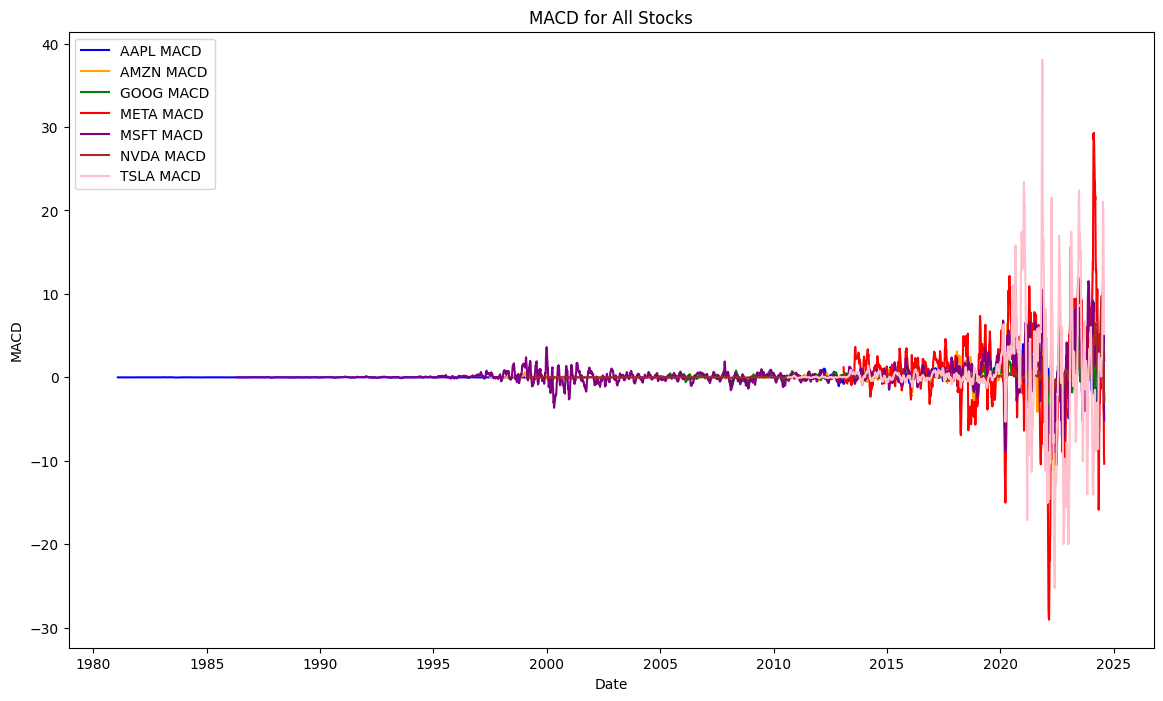

In [30]:
import talib

# Colors for each stock
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

# Initialize a dictionary to store data for each stock
stock_data = {}

# Load and calculate indicators for each stock
for file_path, color in zip(file_paths, colors):
    # Load the data into a DataFrame
    data = pd.read_csv(file_path)
    
    # Extract the stock symbol from the file name
    stock_symbol = os.path.basename(file_path).split('_')[0]
    
    # Convert 'Date' column to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Calculate Moving Averages
    data['SMA_50'] = talib.SMA(data['Close'], timeperiod=50)
    data['SMA_200'] = talib.SMA(data['Close'], timeperiod=200)
    
    # Calculate RSI (Relative Strength Index)
    data['RSI'] = talib.RSI(data['Close'], timeperiod=14)
    
    # Calculate MACD (Moving Average Convergence Divergence)
    data['MACD'], data['MACD_Signal'], data['MACD_Hist'] = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    
    # Store the data in the dictionary
    stock_data[stock_symbol] = (data, color)

# Plot Moving Averages for all stocks
plt.figure(figsize=(14, 8))
for stock_symbol, (data, color) in stock_data.items():
    plt.plot(data['Date'], data['SMA_50'], label=f'{stock_symbol} 50-Day SMA', color=color)
plt.title('50-Day Moving Averages for All Stocks')
plt.xlabel('Date')
plt.ylabel('50-Day SMA')
plt.legend()
plt.show()

# Plot RSI for all stocks
plt.figure(figsize=(14, 8))
for stock_symbol, (data, color) in stock_data.items():
    plt.plot(data['Date'], data['RSI'], label=f'{stock_symbol} RSI', color=color)
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI for All Stocks')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot MACD for all stocks
plt.figure(figsize=(14, 8))
for stock_symbol, (data, color) in stock_data.items():
    plt.plot(data['Date'], data['MACD'], label=f'{stock_symbol} MACD', color=color)
plt.title('MACD for All Stocks')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

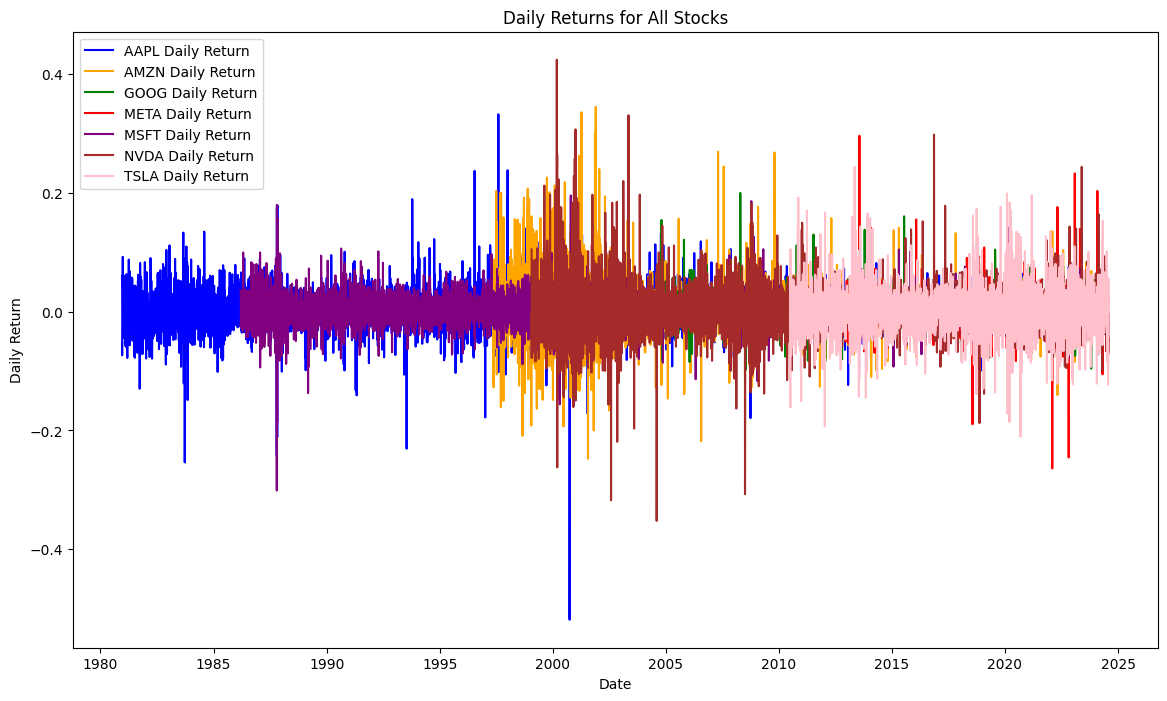

In [29]:
# Colors for each stock
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

# Initialize a dictionary to store data for each stock
stock_data = {}

# Load and calculate financial metrics for each stock
for file_path, color in zip(file_paths, colors):
    # Load the data into a DataFrame
    data = pd.read_csv(file_path)
    
    # Extract the stock symbol from the file name
    stock_symbol = os.path.basename(file_path).split('_')[0]
    
    # Convert 'Date' column to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Calculate daily returns
    data['Daily_Return'] = data['Close'].pct_change()
    
    # Store the data in the dictionary
    stock_data[stock_symbol] = (data, color)

# Plot Daily Returns for all stocks
plt.figure(figsize=(14, 8))
for stock_symbol, (data, color) in stock_data.items():
    plt.plot(data['Date'], data['Daily_Return'], label=f'{stock_symbol} Daily Return', color=color)
plt.title('Daily Returns for All Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()
